In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [3]:
#print(df_train.iloc [1,:])
print(df_train.dtypes)
df_train['Cover_Type'].describe()

Id                                    object
Elevation                              int64
Aspect                                 int64
Slope                                  int64
Horizontal_Distance_To_Hydrology       int64
Vertical_Distance_To_Hydrology         int64
Horizontal_Distance_To_Roadways        int64
Hillshade_9am                          int64
Hillshade_Noon                         int64
Hillshade_3pm                          int64
Horizontal_Distance_To_Fire_Points     int64
Wilderness_Area1                       int64
Wilderness_Area2                       int64
Wilderness_Area3                       int64
Wilderness_Area4                       int64
Soil_Type1                             int64
Soil_Type2                             int64
Soil_Type3                             int64
Soil_Type4                             int64
Soil_Type5                             int64
Soil_Type6                             int64
Soil_Type7                             int64
Soil_Type8

count    14364.00000
mean         4.00000
std          2.00007
min          1.00000
25%          2.00000
50%          4.00000
75%          6.00000
max          7.00000
Name: Cover_Type, dtype: float64

In [4]:
# Soil_Type = df_train(['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
#        'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
#        'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
#        'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
#        'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
#        'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
#        'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
#        'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
#        'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
#        'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])
# np.argmax(Soil_Type, axis=1)

        

In [5]:
# df_train = pd.read_csv('input/train.csv')

In [6]:
# df_train['Slope'] = np.sqrt(df_train['Slope'] + 0.001)
# df_train['Horizontal_Distance_To_Hydrology'] = np.sqrt(df_train['Horizontal_Distance_To_Hydrology'] + 0.001)
# # from scipy.special import boxcox1p
# # lam = 0.15
# # df_train['Vertical_Distance_To_Hydrology'] = boxcox1p(df_train['Vertical_Distance_To_Hydrology'], lam)
# # df_train['Vertical_Distance_To_Hydrology'] = np.log(df_train['Vertical_Distance_To_Hydrology'] + 0.001 + np.absolute(np.min(df_train['Vertical_Distance_To_Hydrology'])))

# df_train['Horizontal_Distance_To_Roadways'] = np.log(df_train['Horizontal_Distance_To_Roadways'] + 0.001)

# df_train['Hillshade_9am'] = np.log(df_train['Hillshade_9am'] + 0.001)

# # df_train['Hillshade_Noon'] = np.log(df_train['Hillshade_Noon'] + 0.001)

# # df_train['Hillshade_3pm'] = np.sqrt(df_train['Hillshade_3pm'] + 0.001)

# df_train['Horizontal_Distance_To_Fire_Points'] = np.log(df_train['Horizontal_Distance_To_Fire_Points'] + 0.001)



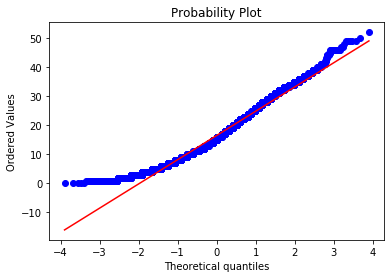

In [7]:
#sns.distplot(df_train['Cover_Type']);
sns.distplot(df_train['Slope'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Slope'], plot=plt)
# Index(['Id', 'Elevation', 'Aspect', 'Slope',
#        'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
#        'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
#        'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
#        'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
#        'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
#        'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
#        'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
#        'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
#        'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
#        'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
#        'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
#        'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
#        'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
#        'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
#        'Cover_Type'],
#       dtype='object')

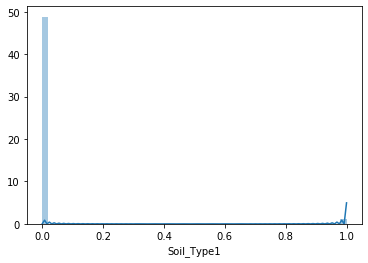

In [8]:
sns.distplot(df_train['Soil_Type1']);

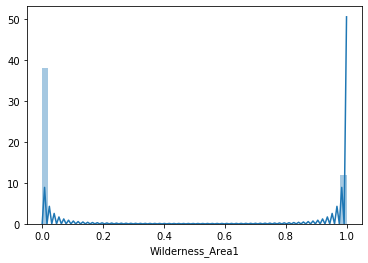

In [9]:
sns.distplot(df_train['Wilderness_Area1']);

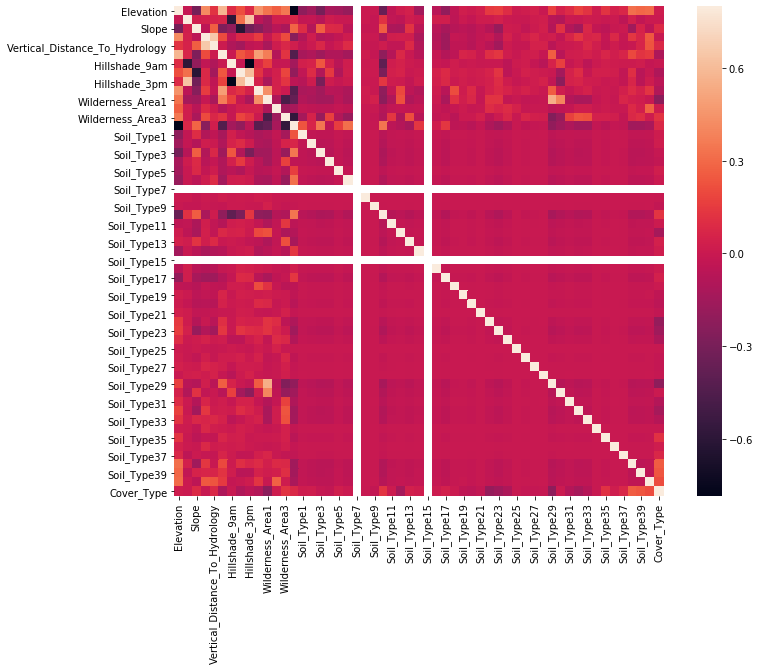

In [10]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [11]:
#sns.distplot(df_train['Soil_Type7']);
#sns.distplot(df_train['Soil_Type15']);
#print(df_train['Soil_Type15'], df_train['Soil_Type7'])
print(df_train['Soil_Type15'].sum(axis=0), df_train['Soil_Type7'].sum(axis=0))

0 0


In [12]:
# df_train = df_train.drop(['Soil_Type7', 'Soil_Type15'], axis=1)
# corrmat = df_train.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

In [13]:
#df_train['Cover_Type'] = keras.utils.to_categorical(df_train['Cover_Type'])  # One-hot encoding
print(df_train['Cover_Type'])
y_train = df_train.pop('Cover_Type')
x_train = df_train


0        2
1        3
2        7
3        4
4        5
        ..
14359    6
14360    2
14361    6
14362    2
14363    5
Name: Cover_Type, Length: 14364, dtype: int64


In [14]:
# 資料前處理
train_ID = x_train.pop('Id')
x_train = (x_train-x_train.min(axis=0))/(x_train.max(axis=0)-x_train.min(axis=0)+1e-7)  # normalization



In [15]:

y_train = keras.utils.to_categorical(y_train - 1)  # One-hot encoding



In [16]:
print(y_train.shape)
print(sum(y_train[:,0]))

(14364, 7)
2052.0


In [17]:
# print(y)
print(y_train.shape)
y_train.sum(axis = 0)


(14364, 7)


array([2052., 2052., 2052., 2052., 2052., 2052., 2052.], dtype=float32)

In [18]:
# print(y_train[:, 1:7].sum(axis = 0))
# y_train = y_train[:, 1:7]
# y_train.sum(axis = 0)

In [19]:
total = x_train.isnull().sum().sort_values(ascending=False)
percent = (x_train.isnull().sum()/x_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
Soil_Type40                             0      0.0
Wilderness_Area4                        0      0.0
Soil_Type11                             0      0.0
Soil_Type10                             0      0.0
Soil_Type9                              0      0.0
Soil_Type8                              0      0.0
Soil_Type7                              0      0.0
Soil_Type6                              0      0.0
Soil_Type5                              0      0.0
Soil_Type4                              0      0.0
Soil_Type3                              0      0.0
Soil_Type2                              0      0.0
Soil_Type1                              0      0.0
Wilderness_Area3                        0      0.0
Soil_Type39                             0      0.0
Wilderness_Area2                        0      0.0
Wilderness_Area1                        0      0.0
Horizontal_Distance_To_Fire_Points      0      0.0
Hillshade_3pm                           0      0.0
Hillshade_Noon                          0      0.0

In [20]:
# from numpy import array
# from numpy import argmax
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# # define example
# data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
# values = array(data)
# print(values)
# # integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(values)
# print(integer_encoded)
# # binary encode
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(onehot_encoded)
# # invert first example
# inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
# print(inverted)

In [21]:
# from numpy import array
# from numpy import argmax
# from keras.utils import to_categorical
# # define example
# data = [1, 3, 2, 0, 3, 2, 2, 1, 0, 1]
# data = array(data)
# print(data)
# # one hot encode
# encoded = to_categorical(data)
# print(encoded)
# # invert encoding
# inverted = argmax(encoded[0])
# print(inverted)

In [22]:
# sns.set()
# cols = ['Elevation', 'Aspect', 'Slope',
#        'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
#        'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
#        'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
#        'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
#        'Wilderness_Area4']
# sns.pairplot(df_train[cols], size = 2.5)
# plt.show();

In [23]:
# df_train = df_train.drop(['Id', 'Cover_Type'], axis=1)


In [24]:
print('x shape:', x_train.shape)
print('y shape:', y_train.shape)

x shape: (14364, 54)
y shape: (14364, 7)


In [25]:
# x_train = x_train.astype('float32')
# y = y.astype('float32')

In [26]:
# x_train, x_test, y_train, y_test = train_test_split(x.values,
#                                                       y,
#                                                       test_size=0.1,
#                                                       random_state=40)
# x_train = x
# y_train = y

In [27]:
# print('x_train shape:', x_train.shape, '\ny_train shape:', y_train.shape)
# print('x_test shape:', x_test.shape, '\ny_test shape:', y_test.shape)

In [28]:
def build_model():
    x_input = layers.Input((x_train.shape[1],))
    x = layers.Dense(16, activation='relu')(x_input)
    
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(16, activation='relu')(x)
    
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(16, activation='relu')(x)
    
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(16, activation='relu')(x)
    
    x_output = layers.Dense(7, activation='softmax')(x)

    return keras.models.Model(x_input, x_output)


# from keras import regularizers

# def build_model():
#     x_input = layers.Input((x_train.shape[1],))
#     x = layers.Dense(16,kernel_regularizer=regularizers.l2(0.01), activation='relu')(x_input)
#     x = layers.Dense(32,kernel_regularizer=regularizers.l2(0.01), activation='relu')(x)
#     x = layers.Dense(64,kernel_regularizer=regularizers.l2(0.01), activation='relu')(x)
# #     x = layers.Dense(16, activation='relu')(x_input)
#     x = layers.Dense(32,kernel_regularizer=keras.regularizers.l2(0.01), activation='relu')(x)
#     x = layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.01), activation='relu')(x)
#     x = layers.Dense(32,kernel_regularizer=keras.regularizers.l2(0.01), activation='relu')(x)
#     x = layers.Dense(64,kernel_regularizer=keras.regularizers.l2(0.01), activation='relu')(x)
#     x = layers.Dense(32,kernel_regularizer=keras.regularizers.l2(0.01), activation='relu')(x)
#     x = layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.01), activation='relu')(x)
#     x = layers.Dense(32,kernel_regularizer=keras.regularizers.l2(0.01), activation='relu')(x)
#     x = layers.Dense(64,kernel_regularizer=keras.regularizers.l2(0.01), activation='relu')(x)
#     x = layers.Dense(32,kernel_regularizer=keras.regularizers.l2(0.01), activation='relu')(x)
#     x = layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.01), activation='relu')(x)
#     x = layers.Dense(32,kernel_regularizer=keras.regularizers.l2(0.01), activation='relu')(x)
#     x = layers.Dense(64,kernel_regularizer=keras.regularizers.l2(0.01), activation='relu')(x)
#     x = layers.Dense(32,kernel_regularizer=keras.regularizers.l2(0.01), activation='relu')(x)
#     x = layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.01), activation='relu')(x)
# #     x = layers.Dense(4, activation='relu')(x)
#     x_output = layers.Dense(8, activation='softmax')(x)
#     # x_output = layers.Dense(8, activation='softmax')(x)

#     return keras.models.Model(x_input, x_output)


# def build_model():
#     x_input = layers.Input((x_train.shape[1],))
#     x = layers.Dense(16, activation='relu')(x_input)
#     x = layers.Dense(32, activation='relu')(x)
#     x = layers.Dense(64, activation='relu')(x)
#     x = layers.Dense(128, activation='relu')(x)
#     x = layers.Dense(256, activation='relu')(x)
#     x = layers.Dense(512, activation='relu')(x)
#     x = layers.Dropout(0.6)(x)
#     x = layers.Dense(64, activation='relu')(x)
#     x = layers.Dense(32, activation='relu')(x)
#     x = layers.Dense(16, activation='relu')(x)

#     x_output = layers.Dense(8, activation='softmax')(x)
#     # x_output = layers.Dense(8, activation='softmax')(x)

#     return keras.models.Model(x_input, x_output)


In [29]:
model = build_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy']) #or accuracy
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 54)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                880       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544   

In [30]:
history = model.fit(x_train, y_train, validation_split=0.01, epochs=80, verbose=1) #batch_size=16,

Train on 14220 samples, validate on 144 samples
Epoch 1/80
14220/14220 [==============================] - 3s 230us/sample - loss: 1.2731 - accuracy: 0.4244 - val_loss: 0.9829 - val_accuracy: 0.5833
Epoch 2/80
14220/14220 [==============================] - 2s 169us/sample - loss: 0.8777 - accuracy: 0.6087 - val_loss: 0.9892 - val_accuracy: 0.5694
Epoch 3/80
14220/14220 [==============================] - 2s 121us/sample - loss: 0.8133 - accuracy: 0.6299 - val_loss: 0.8682 - val_accuracy: 0.6458
Epoch 4/80
14220/14220 [==============================] - 1s 104us/sample - loss: 0.7960 - accuracy: 0.6397 - val_loss: 0.8511 - val_accuracy: 0.6389
Epoch 5/80
14220/14220 [==============================] - 2s 116us/sample - loss: 0.7698 - accuracy: 0.6566 - val_loss: 0.8700 - val_accuracy: 0.6667
Epoch 6/80
14220/14220 [==============================] - 2s 109us/sample - loss: 0.7690 - accuracy: 0.6540 - val_loss: 0.8666 - val_accuracy: 0.6389
Epoch 7/80
14220/14220 [============================

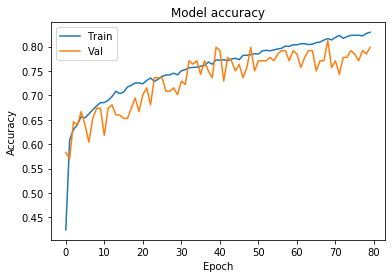

In [39]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [32]:
# results = model.evaluate(x_valid, y_valid, batch_size=128)
# history2 = model.fit(x_valid, y_valid, epochs=50)

In [33]:
# history = model.predict(x_test, y_test, epochs=50, batch_size=16,shuffle=True, verbose=1)

In [33]:
x_sub = pd.read_csv('data/test.csv')
test_ID = x_sub.pop('Id')
# print(x_sub)



In [34]:
# x_test['Slope'] = np.sqrt(x_test['Slope'] + 0.001)
# x_test['Horizontal_Distance_To_Hydrology'] = np.sqrt(x_test['Horizontal_Distance_To_Hydrology'] + 0.001)
# # from scipy.special import boxcox1p
# # lam = 0.15
# # df_train['Vertical_Distance_To_Hydrology'] = boxcox1p(df_train['Vertical_Distance_To_Hydrology'], lam)
# # df_train['Vertical_Distance_To_Hydrology'] = np.log(df_train['Vertical_Distance_To_Hydrology'] + 0.001 + np.absolute(np.min(df_train['Vertical_Distance_To_Hydrology'])))

# x_test['Horizontal_Distance_To_Roadways'] = np.log(x_test['Horizontal_Distance_To_Roadways'] + 0.001)

# x_test['Hillshade_9am'] = np.log(x_test['Hillshade_9am'] + 0.001)

# # df_train['Hillshade_Noon'] = np.log(df_train['Hillshade_Noon'] + 0.001)

# # df_train['Hillshade_3pm'] = np.sqrt(df_train['Hillshade_3pm'] + 0.001)

# x_test['Horizontal_Distance_To_Fire_Points'] = np.log(x_test['Horizontal_Distance_To_Fire_Points'] + 0.001)

In [35]:
x_sub = (x_sub-x_sub.min(axis=0))/(x_sub.max(axis=0)-x_sub.min(axis=0)+1e-7)  # normalization
print(x_sub.shape,x_sub.dtypes)


(756, 54) Elevation                             float64
Aspect                                float64
Slope                                 float64
Horizontal_Distance_To_Hydrology      float64
Vertical_Distance_To_Hydrology        float64
Horizontal_Distance_To_Roadways       float64
Hillshade_9am                         float64
Hillshade_Noon                        float64
Hillshade_3pm                         float64
Horizontal_Distance_To_Fire_Points    float64
Wilderness_Area1                      float64
Wilderness_Area2                      float64
Wilderness_Area3                      float64
Wilderness_Area4                      float64
Soil_Type1                            float64
Soil_Type2                            float64
Soil_Type3                            float64
Soil_Type4                            float64
Soil_Type5                            float64
Soil_Type6                            float64
Soil_Type7                            float64
Soil_Type8              

In [36]:
# x_sub = x_sub.astype('float32')

In [37]:
pred = model.predict(x_sub)
# print(pred)
# print(sum(pred[:,0]),sum(pred[:,1]),sum(pred[:,2]),sum(pred[:,3]),sum(pred[:,4]),sum(pred[:,5]),sum(pred[:,6]),sum(pred[:,7]))
inverted = np.argmax(pred, axis = 1) + 1
# print(inverted)
# np.argmax(pred[0,:])
# pred[0,:]
inverted

array([5, 4, 3, 5, 2, 1, 6, 5, 4, 2, 2, 4, 6, 7, 7, 7, 6, 3, 3, 3, 5, 1,
       1, 3, 1, 7, 1, 5, 3, 2, 6, 1, 3, 3, 7, 7, 3, 7, 4, 5, 7, 6, 2, 5,
       3, 7, 6, 5, 4, 7, 6, 3, 5, 2, 3, 3, 5, 5, 1, 4, 1, 3, 3, 4, 2, 5,
       5, 6, 1, 3, 2, 6, 4, 3, 5, 6, 1, 1, 2, 3, 1, 3, 6, 1, 3, 3, 1, 7,
       6, 2, 2, 6, 3, 1, 7, 3, 7, 7, 3, 1, 1, 4, 3, 1, 5, 7, 7, 7, 5, 4,
       7, 1, 1, 5, 3, 6, 7, 2, 2, 7, 3, 7, 7, 3, 1, 6, 2, 4, 7, 5, 6, 2,
       4, 3, 1, 3, 7, 7, 2, 5, 3, 1, 4, 2, 1, 7, 4, 3, 4, 6, 4, 3, 4, 1,
       6, 5, 1, 4, 5, 2, 3, 5, 2, 3, 4, 2, 6, 7, 1, 1, 4, 7, 4, 5, 2, 6,
       6, 6, 7, 2, 1, 6, 4, 3, 7, 6, 2, 2, 6, 1, 1, 4, 6, 7, 7, 3, 6, 2,
       1, 4, 3, 5, 5, 6, 7, 6, 4, 5, 1, 5, 5, 7, 2, 6, 6, 1, 7, 2, 1, 1,
       7, 1, 4, 4, 6, 2, 3, 7, 4, 3, 4, 7, 1, 3, 5, 2, 7, 1, 7, 4, 7, 3,
       1, 1, 1, 2, 1, 3, 6, 6, 6, 1, 4, 2, 3, 4, 7, 2, 7, 4, 1, 1, 4, 5,
       7, 7, 5, 5, 4, 2, 2, 3, 7, 3, 1, 2, 6, 6, 4, 1, 5, 2, 2, 1, 4, 4,
       3, 6, 1, 6, 5, 1, 3, 2, 5, 5, 1, 2, 7, 3, 1,

In [45]:

sub = pd.DataFrame()
sub['Id'] = test_ID
sub['class'] = inverted

sub2 = pd.read_csv('data/sampleSubmission.csv')
# print(sub2)

sub3 = pd.merge(sub2, sub, left_on='Id', right_on='Id', how='left').drop('class_x', axis=1)
sub3 = sub3.rename(columns={"class_y": "class"})

print(sub3['class'].values-1)
# sub3.to_csv('submission.csv',index=False)

[0 2 5 6 4 5 2 5 2 6 1 5 1 4 4 4 0 6 4 0 2 5 1 0 1 0 3 2 6 2 3 2 2 3 1 3 0
 5 3 4 1 0 2 5 1 0 2 6 1 4 3 2 4 5 1 6 0 0 3 0 5 5 5 5 3 1 6 2 1 1 0 0 6 4
 2 3 2 1 3 3 3 4 4 6 2 5 1 6 0 5 2 6 3 0 4 6 2 5 2 1 2 1 1 6 0 0 2 0 3 1 0
 5 4 0 3 3 3 2 2 3 2 6 0 2 3 0 5 1 1 1 3 6 3 5 0 0 3 1 3 4 0 4 6 4 4 6 4 5
 4 6 5 5 3 0 5 0 6 5 1 3 3 6 3 5 1 1 2 4 4 1 1 5 6 4 4 2 2 6 6 3 4 4 5 6 4
 5 5 6 5 3 5 3 6 6 1 6 0 5 2 6 2 4 6 2 5 0 3 4 5 6 6 5 1 4 1 5 0 1 6 0 3 3
 6 3 0 3 6 1 1 2 2 1 2 6 1 6 1 2 4 5 6 2 2 5 1 0 6 2 6 6 6 5 5 1 6 1 1 3 6
 3 2 1 1 2 6 2 1 4 0 2 6 2 3 2 2 0 6 1 0 3 2 4 4 0 0 4 0 3 0 3 1 2 2 4 6 2
 2 1 6 6 3 3 1 5 3 0 0 2 2 5 1 2 6 0 0 0 6 3 2 3 0 0 4 6 3 0 3 2 2 5 5 0 3
 5 6 6 3 5 2 2 6 0 0 6 6 6 4 3 2 2 3 6 4 6 4 0 3 5 2 0 6 3 2 2 1 6 5 5 4 3
 1 3 3 2 0 0 0 6 6 6 0 2 0 4 1 1 2 6 0 1 1 5 3 1 1 5 6 0 6 6 3 6 6 2 3 5 6
 1 3 0 1 2 6 6 1 0 1 6 5 1 4 3 3 4 3 3 5 0 5 3 3 0 0 4 3 0 1 1 0 3 2 3 3 2
 5 2 4 3 2 6 0 5 4 2 2 6 6 2 1 2 4 5 5 2 2 4 6 6 0 5 6 5 1 6 4 2 0 5 1 2 0
 4 4 0 5 5 2 6 6 1 4 6 1 

In [49]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
y_val = pd.read_csv('./data/ans.csv').drop(labels=['Id'],axis=1).values
y_val = to_categorical(y_val-1)
pred=inverted-1
label=np.argmax(y_val,axis=1)
print(accuracy_score(label, pred))

0.6666666666666666


In [ ]:
# loss = keras.losses.CategoricalCrossentropy()
# optimizer = keras.optimizers.Adam(learning_rate=0.001) #adam = momentum

In [ ]:

# # 建立 list 記錄訓練結果
# train_loss_epoch = []
# valid_loss_epoch = []

# model = build_model()

# # 設定訓練參數
# batch_size = 64
# num_epochs = 50
# num_batchs = x_train.shape[0]//batch_size

# # 定義 Training loop
# for epoch in range(num_epochs):
#     print('-------------------- epoch', epoch+1, ' --------------------')
#     train_loss_batch = []
#     for batchs in tqdm_notebook(range(num_batchs)):
#         # 每次拿一個 batch size 的資料作訓練
#         idx_start = batchs * batch_size
#         idx_stop = (batchs+1) * batch_size

#         train_x = x_train[idx_start:idx_stop]
#         train_y = y_train[idx_start:idx_stop]

#         # 開始記錄所有變數的運算 (正向傳播)
#         with tf.GradientTape() as tape:
#             predictions = model(train_x)
#             loss_value = loss(train_y, predictions)

#         # 計算 gradients = dloss / dweight (反向傳播)
#         gradients = tape.gradient(loss_value, model.trainable_variables)

#         # 更新權重 (weights = weights - learning_rate * gradients)
#         optimizer.apply_gradients(zip(gradients, model.trainable_variables))

#         train_loss_batch.append(loss_value.numpy())

#     # 計算 validation loss
#     valid_loss = loss(y_valid, model(x_valid)).numpy()
#     train_loss = np.mean(train_loss_batch)
#     valid_loss_epoch.append(valid_loss)
#     train_loss_epoch.append(train_loss)
#     print('training loss:', train_loss, '\nvalidation loss:', valid_loss, '\n')

#     # 重排 data 的順序
#     idx = shuffle(np.arange(x_train.shape[0]))
#     x_train = x_train[idx]
#     y_train = y_train[idx]

In [42]:
# plt.plot(train_loss_epoch, 'b', label='train')
# plt.plot(valid_loss_epoch, 'r', label='valid')
# plt.legend()